In [31]:
import pandas as pd
df = pd.read_csv("data/raw/energy_data.csv")
df.head()


,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,128,0,80,907,1115
1,2023-01-01 01:00:00,52,0,35,0,87
2,2023-01-01 02:00:00,105,0,52,0,157
3,2023-01-01 03:00:00,153,0,0,0,153
4,2023-01-01 04:00:00,113,0,62,0,175


In [32]:
import numpy as np
import matplotlib.pyplot as plt
df['hour'] = df.index.hour
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['month'] = df.index.month
df['month_name'] = df.index.month_name()

AttributeError: 'RangeIndex' object has no attribute 'hour'

In [33]:
type(df.index)

pandas.RangeIndex

In [34]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df = df.sort_index()

In [35]:
df.columns

Index(['fridge', 'ac', 'lights', 'microwave', 'total_power'], dtype='str')

In [36]:
type(df.index)

pandas.DatetimeIndex

In [37]:
df['hour'] = df.index.hour
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['month'] = df.index.month
monthly = df.groupby('month_name')['total_power'].mean()
monthly.plot(kind='bar', figsize=(8,4), title="Average Power per Month")
plt.ylabel("Watts")
plt.show()

KeyError: 'month_name'

In [9]:
type(df.index)

pandas.DatetimeIndex

In [29]:
df['month_name'] = df.index.month_name()
df[['month_name']].head()

,month_name
timestamp,
2023-01-01 00:00:00,January
2023-01-01 01:00:00,January
2023-01-01 02:00:00,January
2023-01-01 03:00:00,January
2023-01-01 04:00:00,January


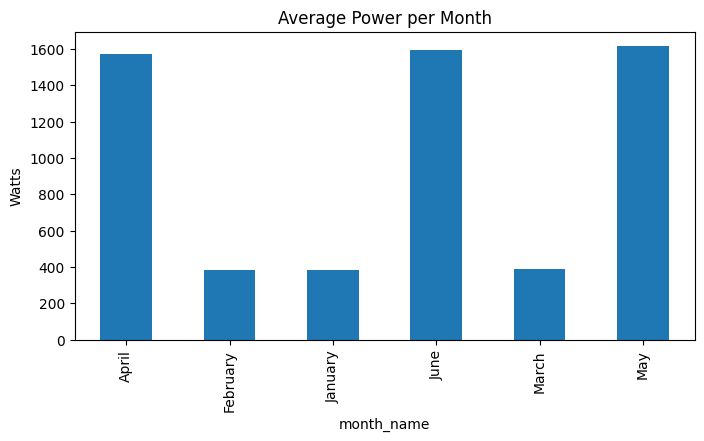

In [12]:
monthly = df.groupby('month_name')['total_power'].mean()
monthly.plot(kind='bar', figsize=(8,4))
plt.ylabel("Watts")
plt.title("Average Power per Month")
plt.show()

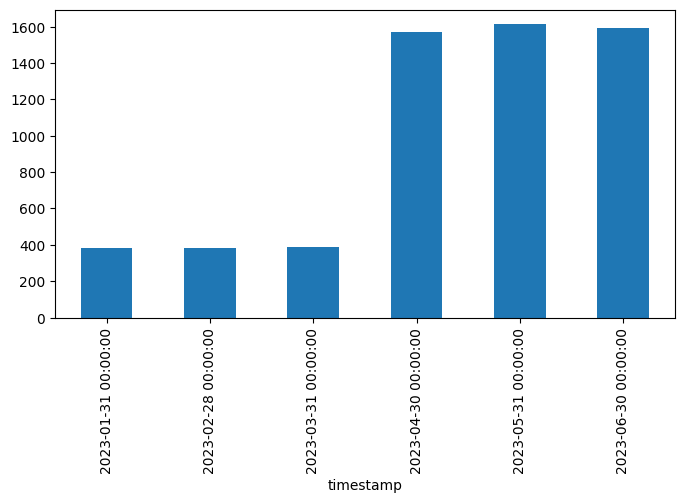

In [13]:
monthly = df.resample('ME')['total_power'].mean()
monthly.plot(kind='bar', figsize=(8,4))
plt.show()

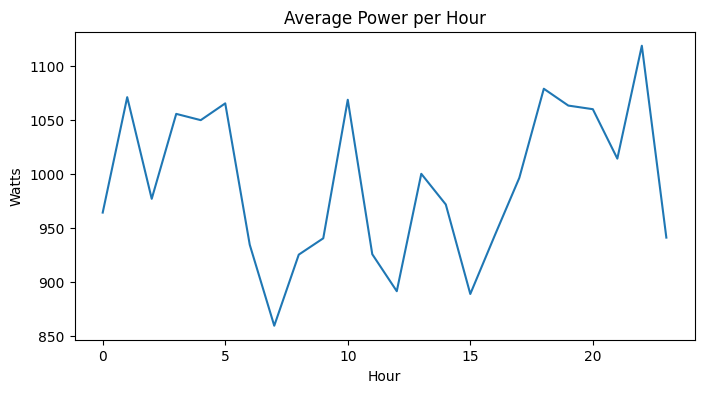

In [14]:
hourly = df.groupby('hour')['total_power'].mean()
hourly.plot(figsize=(8,4), title="Average Power per Hour")
plt.xlabel("Hour")
plt.ylabel("Watts")
plt.show()

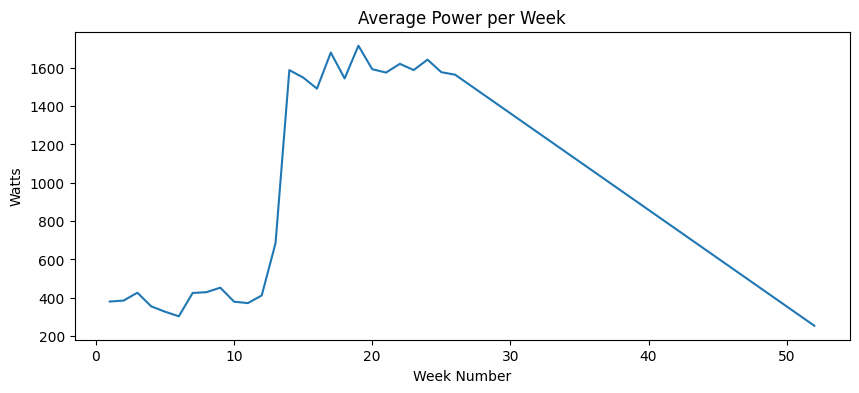

In [15]:
weekly = df.groupby('week')['total_power'].mean()
weekly.plot(figsize=(10,4), title="Average Power per Week")
plt.xlabel("Week Number")
plt.ylabel("Watts")
plt.show()

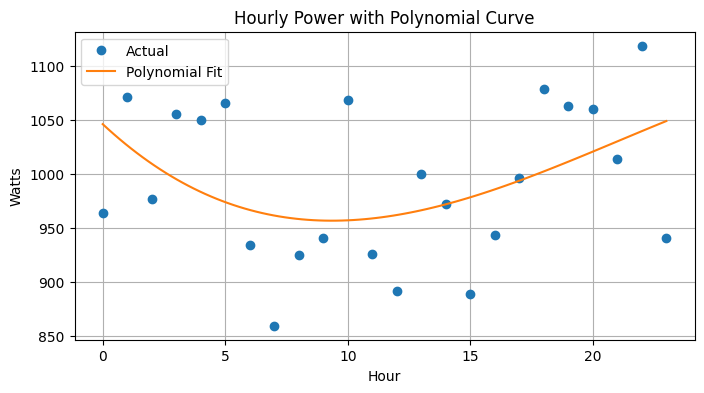

In [16]:
from numpy.polynomial.polynomial import polyfit, polyval
x_hour = hourly.index.values
y_hour = hourly.values
coef = polyfit(x_hour, y_hour, 3)
x_new = np.linspace(0,23,100)
y_new = polyval(x_new, coef)
plt.figure(figsize=(8,4))
plt.plot(x_hour, y_hour, 'o', label='Actual')
plt.plot(x_new, y_new, '-', label='Polynomial Fit')
plt.title("Hourly Power with Polynomial Curve")
plt.xlabel("Hour")
plt.ylabel("Watts")
plt.legend()
plt.grid()
plt.show()

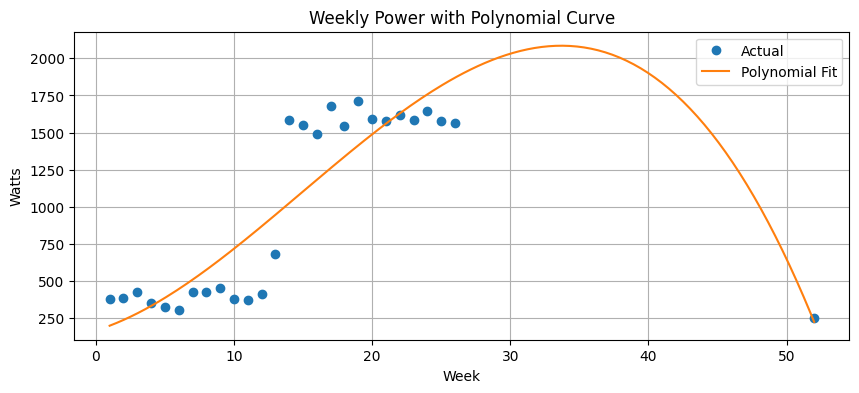

In [17]:
x_week = weekly.index.values
y_week = weekly.values

coef_w = polyfit(x_week, y_week, 3)

x_new = np.linspace(x_week.min(), x_week.max(), 200)
y_new = polyval(x_new, coef_w)

plt.figure(figsize=(10,4))
plt.plot(x_week, y_week, 'o', label='Actual')
plt.plot(x_new, y_new, '-', label='Polynomial Fit')

plt.title("Weekly Power with Polynomial Curve")
plt.xlabel("Week")
plt.ylabel("Watts")
plt.legend()
plt.grid()
plt.show()

In [19]:
df['month'] = df.index.month
df['month_name'] = df.index.month_name()
df['hour'] = df.index.hour

In [21]:
df[['month_name','hour']].head()

,month_name,hour
timestamp,,
2023-01-01 00:00:00,January,0
2023-01-01 01:00:00,January,1
2023-01-01 02:00:00,January,2
2023-01-01 03:00:00,January,3
2023-01-01 04:00:00,January,4


In [22]:
monthly_hourly = df.groupby(['month_name','hour'])['total_power'].mean()

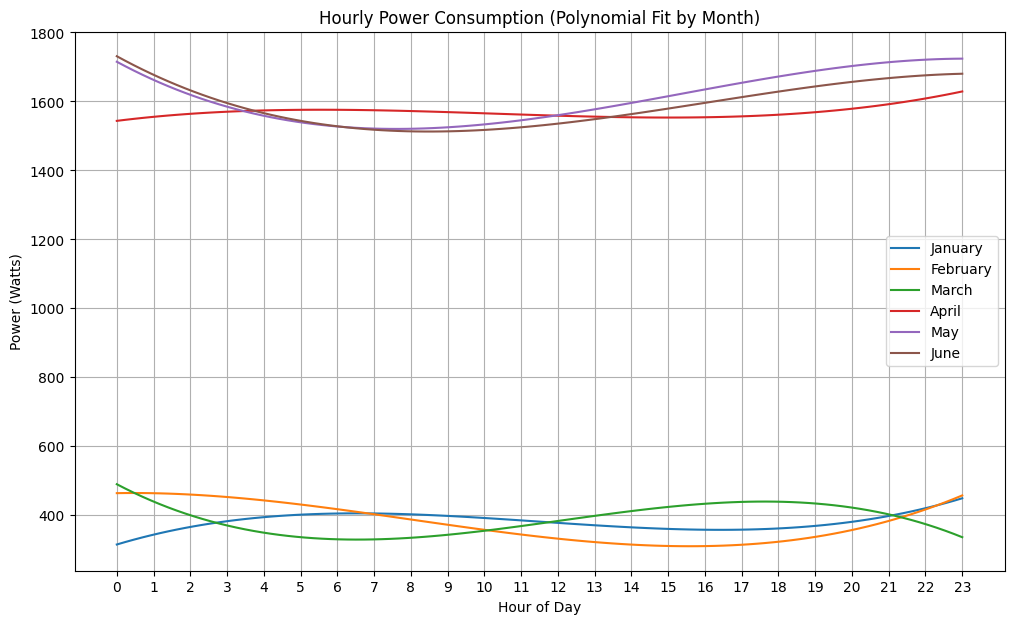

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit, polyval

plt.figure(figsize=(12,7))

months = df['month_name'].unique()

for month in months:
    data = monthly_hourly.loc[month]

    x = data.index.values      
    y = data.values            
    coef = polyfit(x, y, 3)
    x_new = np.linspace(0,23,100)
    y_new = polyval(x_new, coef)
    plt.plot(x_new, y_new, label=month)
plt.title("Hourly Power Consumption (Polynomial Fit by Month)")
plt.xlabel("Hour of Day")
plt.ylabel("Power (Watts)")
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()